In [48]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [28]:
df = yf.download("TSLA")

C:\Users\srmpc\AppData\Local\Temp\ipykernel_17904\2739912864.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA")
[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [19]:
#ARIMA Model
df.isnull().sum()

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3772 entries, 2010-06-29 to 2025-06-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3772 non-null   float64
 1   (High, TSLA)    3772 non-null   float64
 2   (Low, TSLA)     3772 non-null   float64
 3   (Open, TSLA)    3772 non-null   float64
 4   (Volume, TSLA)  3772 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.8 KB


In [21]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3772 entries, 2010-06-29 to 2025-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3772 non-null   float64
 1   High    3772 non-null   float64
 2   Low     3772 non-null   float64
 3   Open    3772 non-null   float64
 4   Volume  3772 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.8 KB


In [23]:
correlation_mat = df.corr()
corr_with_close = correlation_mat['Close'].sort_values(ascending=False)
print(corr_with_close)

Close     1.000000
Low       0.999656
High      0.999625
Open      0.999148
Volume    0.093945
Name: Close, dtype: float64


In [25]:
# df['Close].plot()

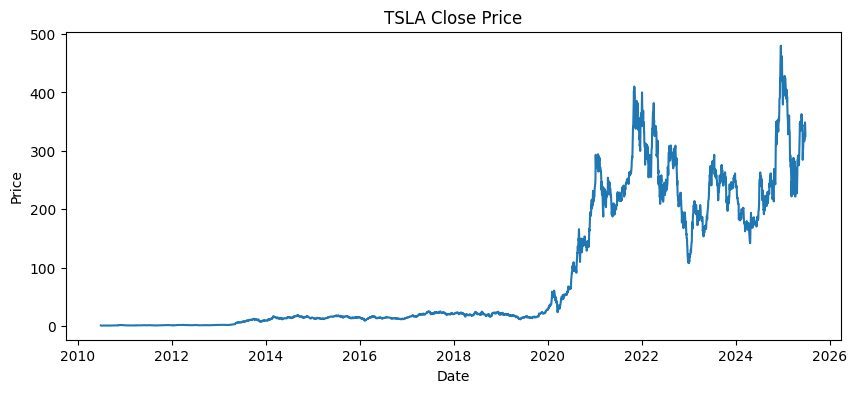

In [26]:
#ARIMA MODEL
close = df['Close']
plt.figure(figsize=(10,4))
plt.plot(close)
plt.title('TSLA Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
#Checking Stationarity - ADF Test
result = adfuller(close)
print('ADF Statictic: ', result[0])
print('p - value: ', result[1])

ADF Statictic:  -1.1194685905958148
p - value:  0.7072459437740211


ADF static after defferencing:  -11.24556462370378
p - value after differencing:  1.7632000263538848e-20


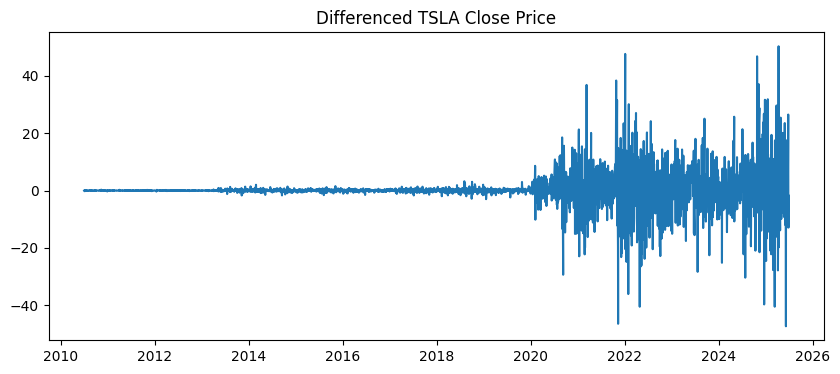

In [32]:
#Not Stationary - Making It stationary
close_diff = close.diff().dropna()

#ADF testing again
result_diff = adfuller(close_diff)
print('ADF static after defferencing: ', result_diff[0])
print('p - value after differencing: ', result_diff[1])

#Ploting differenced series
plt.figure(figsize=(10,4))
plt.plot(close_diff)
plt.title('Differenced TSLA Close Price')
plt.show()

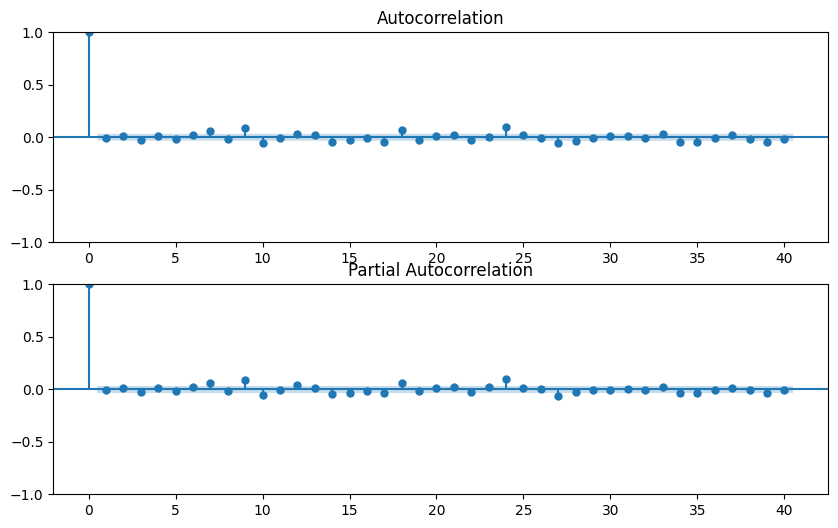

In [34]:
#Ploting ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(close_diff, ax = ax[0], lags=40)
plot_pacf(close_diff, ax = ax[1], lags=40)
plt.show()

In [45]:
#Training Model
train = close[:-30]
test = close[-30:]

In [47]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3742
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11755.194
Date:                Fri, 27 Jun 2025   AIC                          23520.387
Time:                        21:29:49   BIC                          23551.523
Sample:                             0   HQIC                         23531.462
                               - 3742                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1233      0.554     -0.222      0.824      -1.210       0.963
ar.L2          0.2162      0.433      0.500      0.617      -0.631       1.064
ma.L1          0.1108      0.557      0.199      0.8

In [43]:
forecast = model_fit.forecast(steps = 30)

c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from pmdarima import auto_arima

model_auto = auto_arima(close, seasonal=False, trace=True)
print(model_auto.summary())

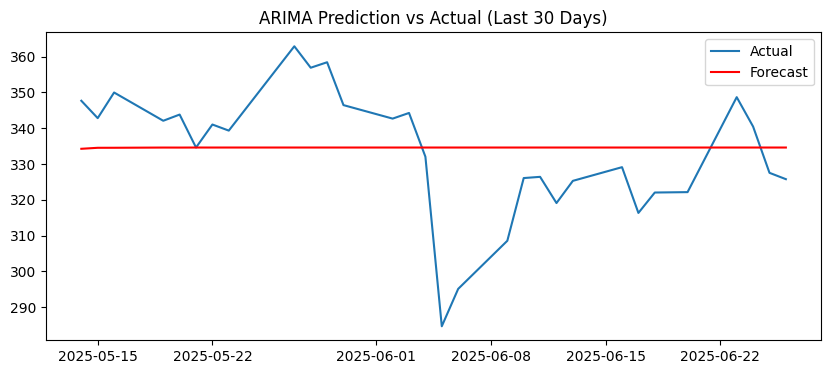

In [44]:
plt.figure(figsize=(10,4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color = 'red')
plt.title("ARIMA Prediction vs Actual (Last 30 Days)")
plt.legend()
plt.show()

In [50]:
exog = df[['Open', 'High', 'Low', 'Volume']]

model = SARIMAX(train, exog=exog, order=(1,1,1), seasonal_order=(1,1,1,5))
model_fit = model.fit()
print(model_fit.summary())


ValueError: The indices for endog and exog are not aligned